Distribution of Scores

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eq5d=pd.read_csv('rq1_cleaned_no_ae.csv')




In [14]:
scores=pd.read_excel('../data/Scores 6 Jan 2025_Prescribed_Completed Baseline PROMs.xlsx')
gad7=scores[scores['promName']=='GAD7']
gad7=gad7[['SID','Round','promName','total_score','completionDate']]


gad7_wide = gad7.pivot_table(index='SID', 
                                    columns='Round', 
                                    values='total_score', 
                                    aggfunc='first')

gad7_wide.columns = [f"GAD7_Round{r}" for r in gad7_wide.columns]
gad7_wide = gad7_wide.reset_index()
gad7= pd.merge(eq5d, gad7_wide, on='SID', how='left')
gad7=gad7.rename(columns={'GAD7_Round1_y': 'GAD7_Round1',})

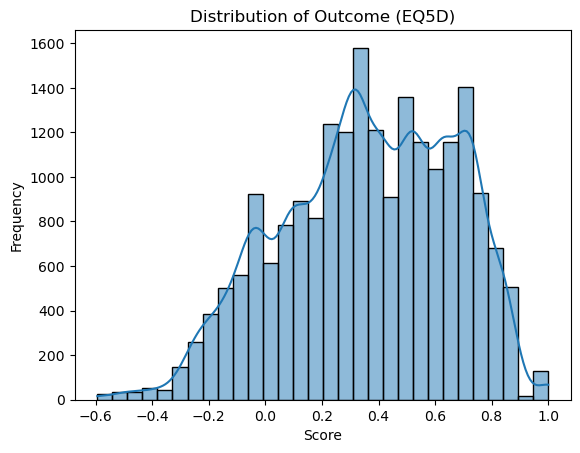

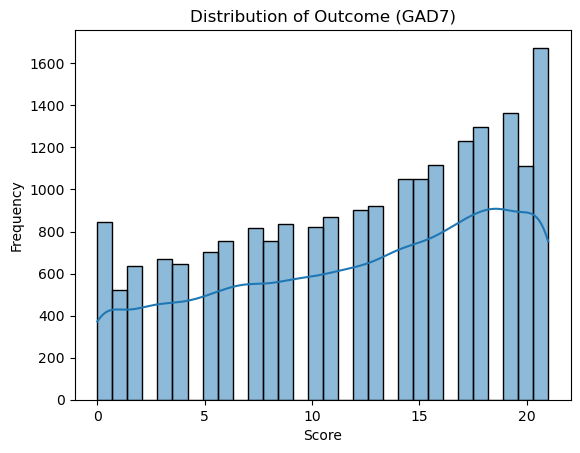

In [4]:
sns.histplot(eq5d['EQ5D_Round1'], kde=True, bins=30)
plt.title('Distribution of Outcome (EQ5D)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(gad7['GAD7_Round1'], kde=True, bins=30)
plt.title('Distribution of Outcome (GAD7)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix of Predictors

In [6]:
eq5d.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1',
 'insomniaEfficacyMeasure_Round1',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neuropathi

In [3]:
gad7.columns

Index(['SID', 'EQ5D_Round1', 'EQ5D_Round2', 'EQ5D_Round3', 'EQ5D_Round4',
       'EQ5D_Round5', 'EQ5D_Round6', 'Age', 'Sex', 'occupation',
       ...
       'GAD7_Round4', 'GAD7_Round5', 'GAD7_Round6', 'GAD7_Round7',
       'GAD7_Round8', 'GAD7_Round9', 'GAD7_Round10', 'GAD7_Round11',
       'GAD7_Round12', 'GAD7_Round13'],
      dtype='object', length=122)

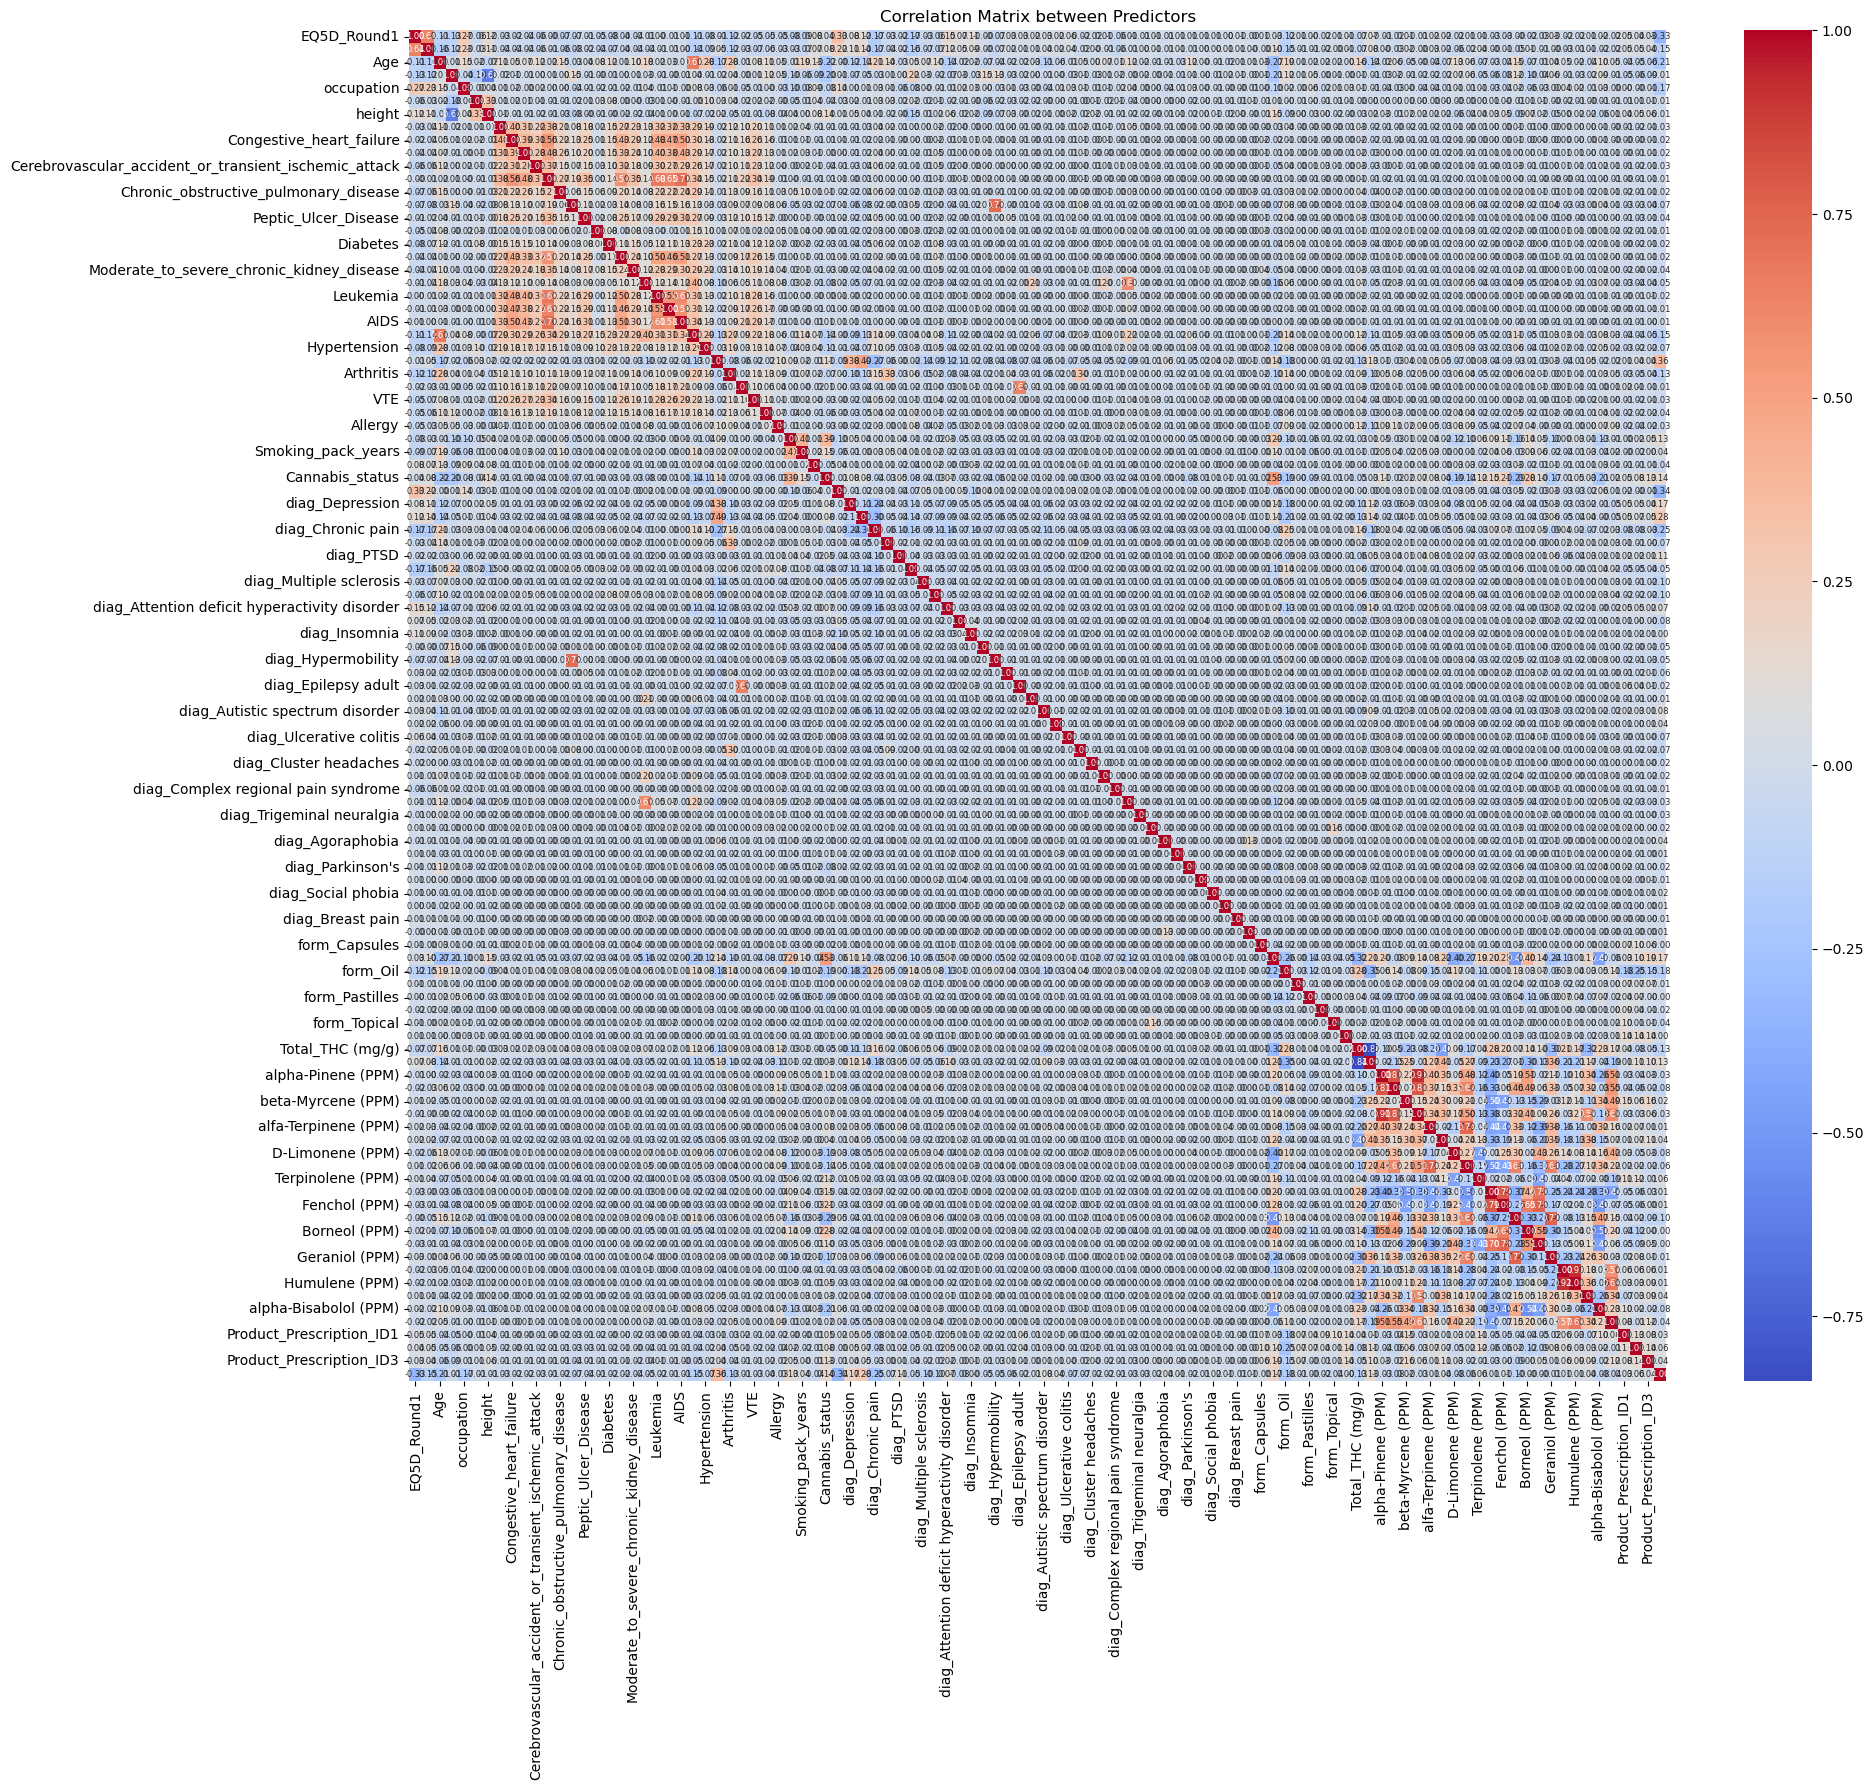

In [9]:
eq5d_predictors = gad7.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
  'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])


# Calculate correlation matrix between predictors
eq5d_corr_matrix = eq5d_predictors.corr()

plt.figure(figsize=(20, 18))  

sns.heatmap(
    eq5d_corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 6}  
)

plt.xticks(rotation=90) 
plt.yticks(rotation=0)  
plt.title('Correlation Matrix between Predictors')
plt.tight_layout()
plt.show()


c:\Users\abbyh\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\abbyh\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


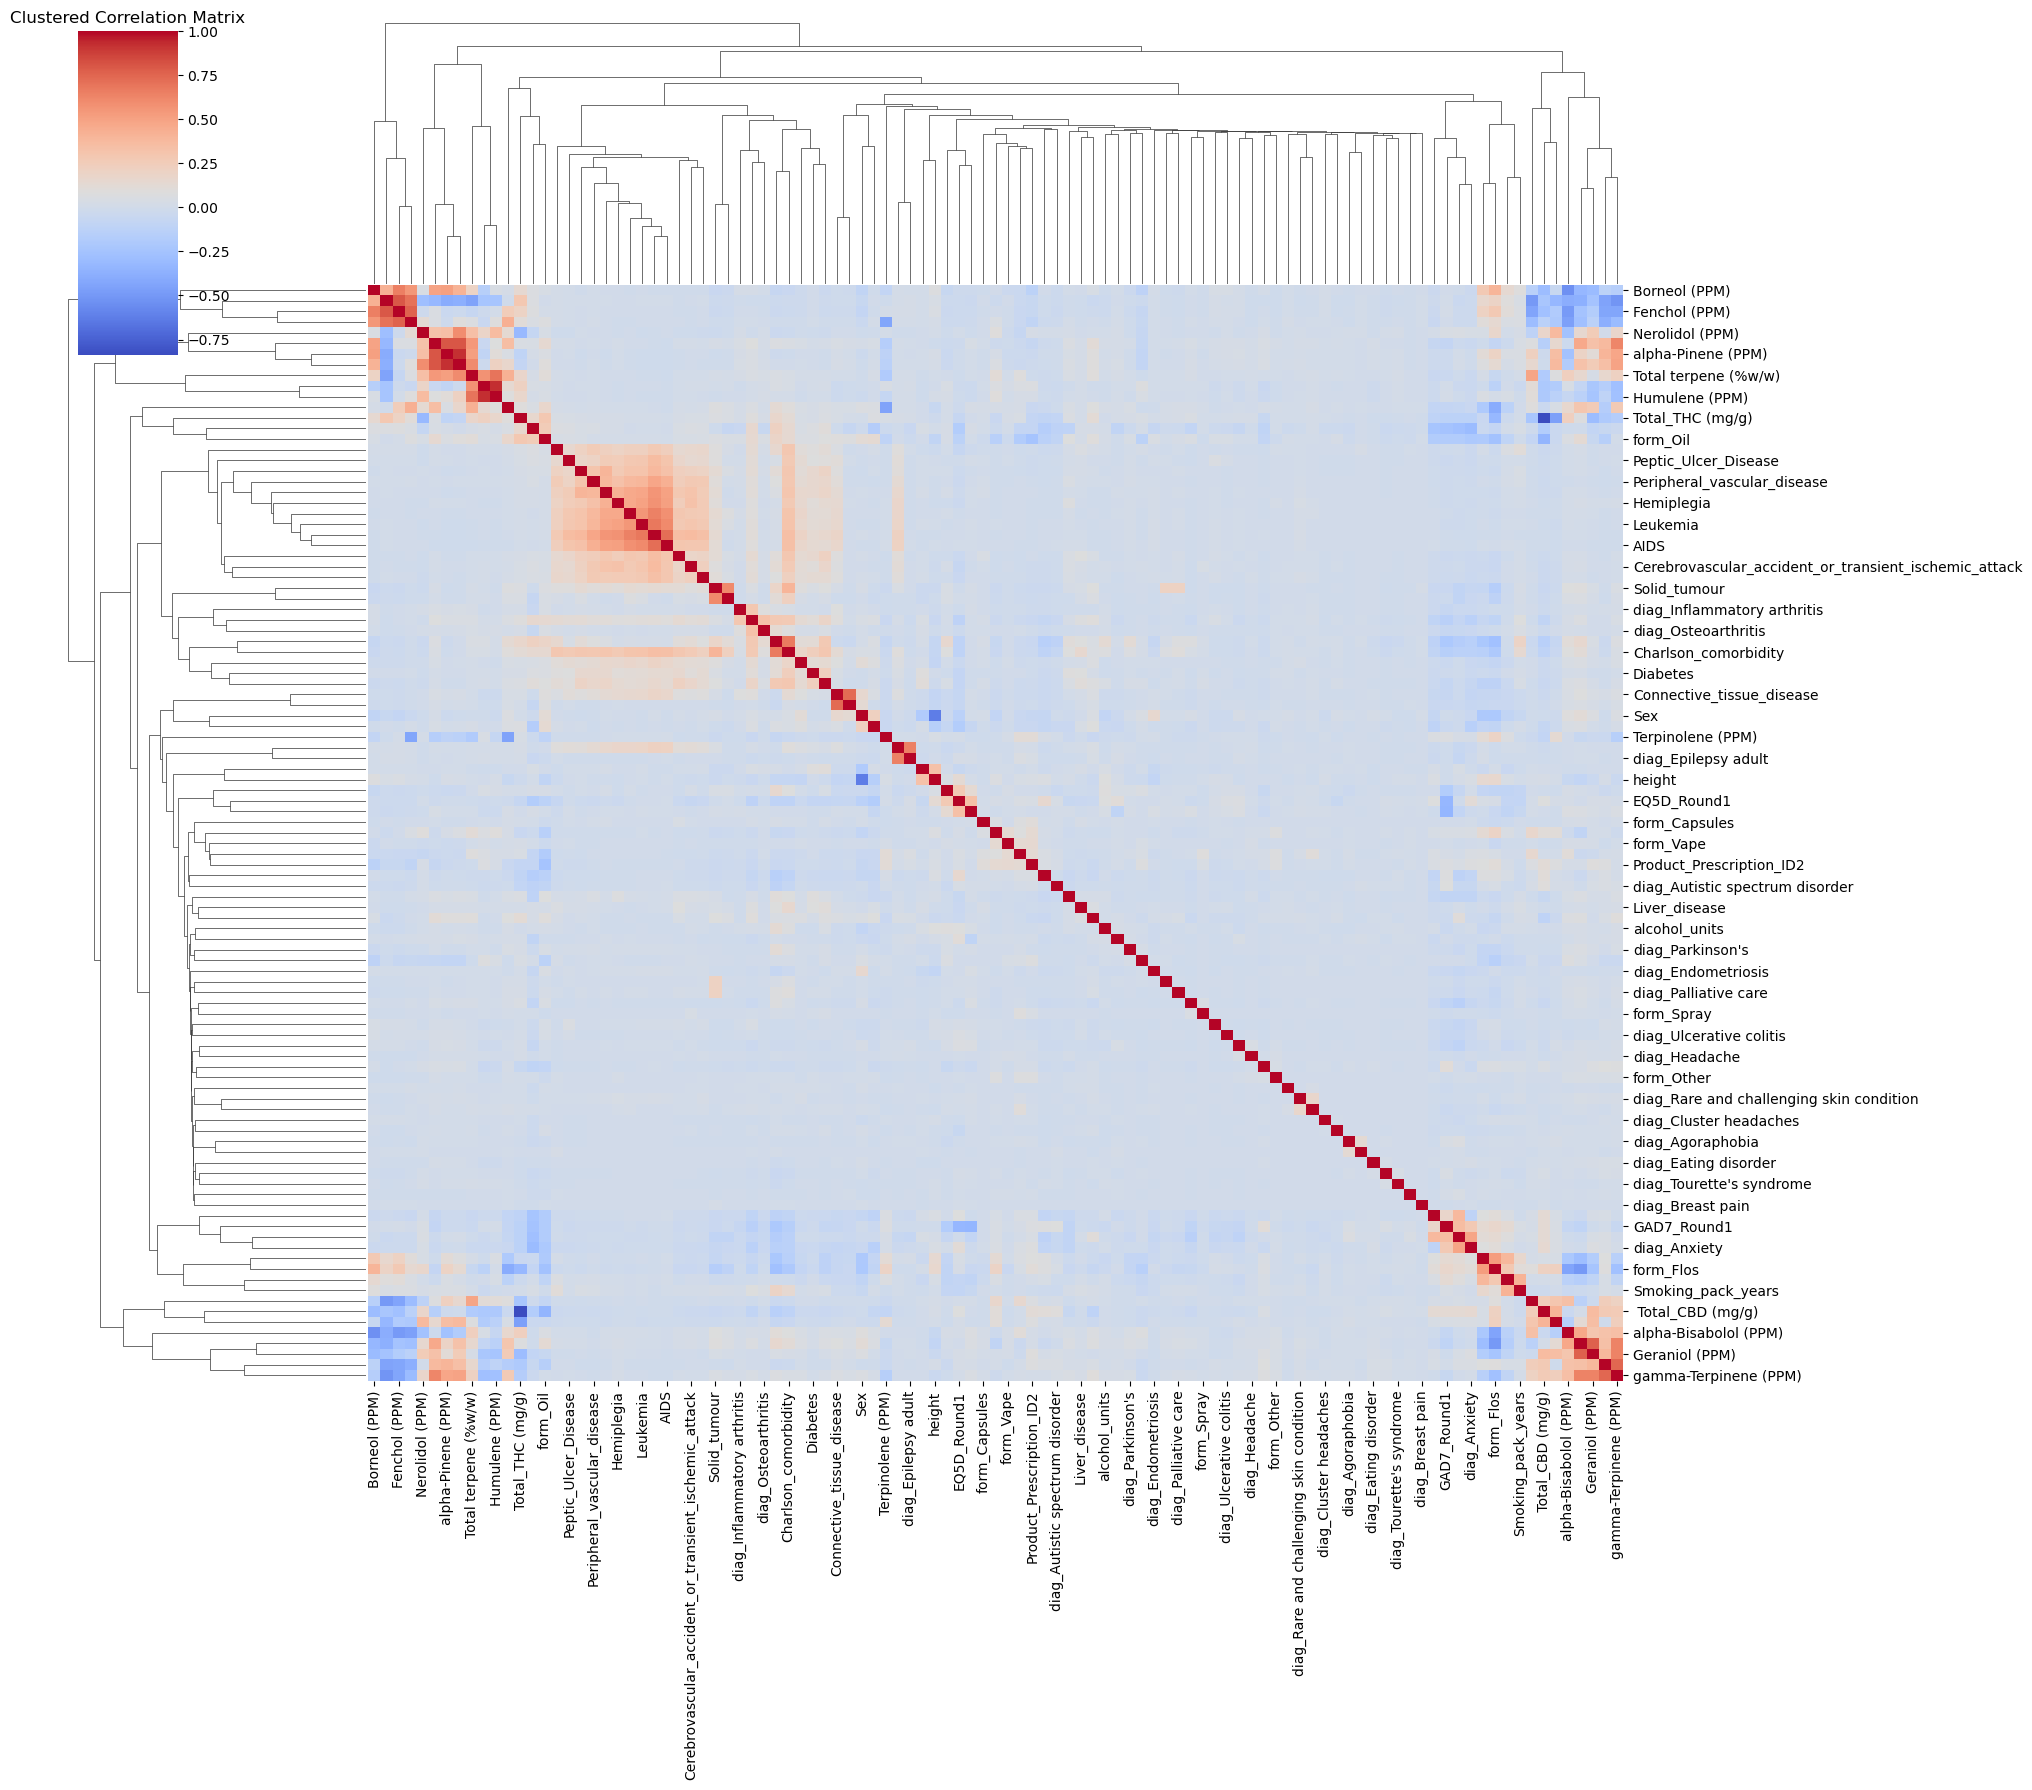

In [10]:
sns.clustermap(
    eq5d_corr_matrix,
    cmap='coolwarm',
    figsize=(20, 18)
)
plt.title('Clustered Correlation Matrix')
plt.show()


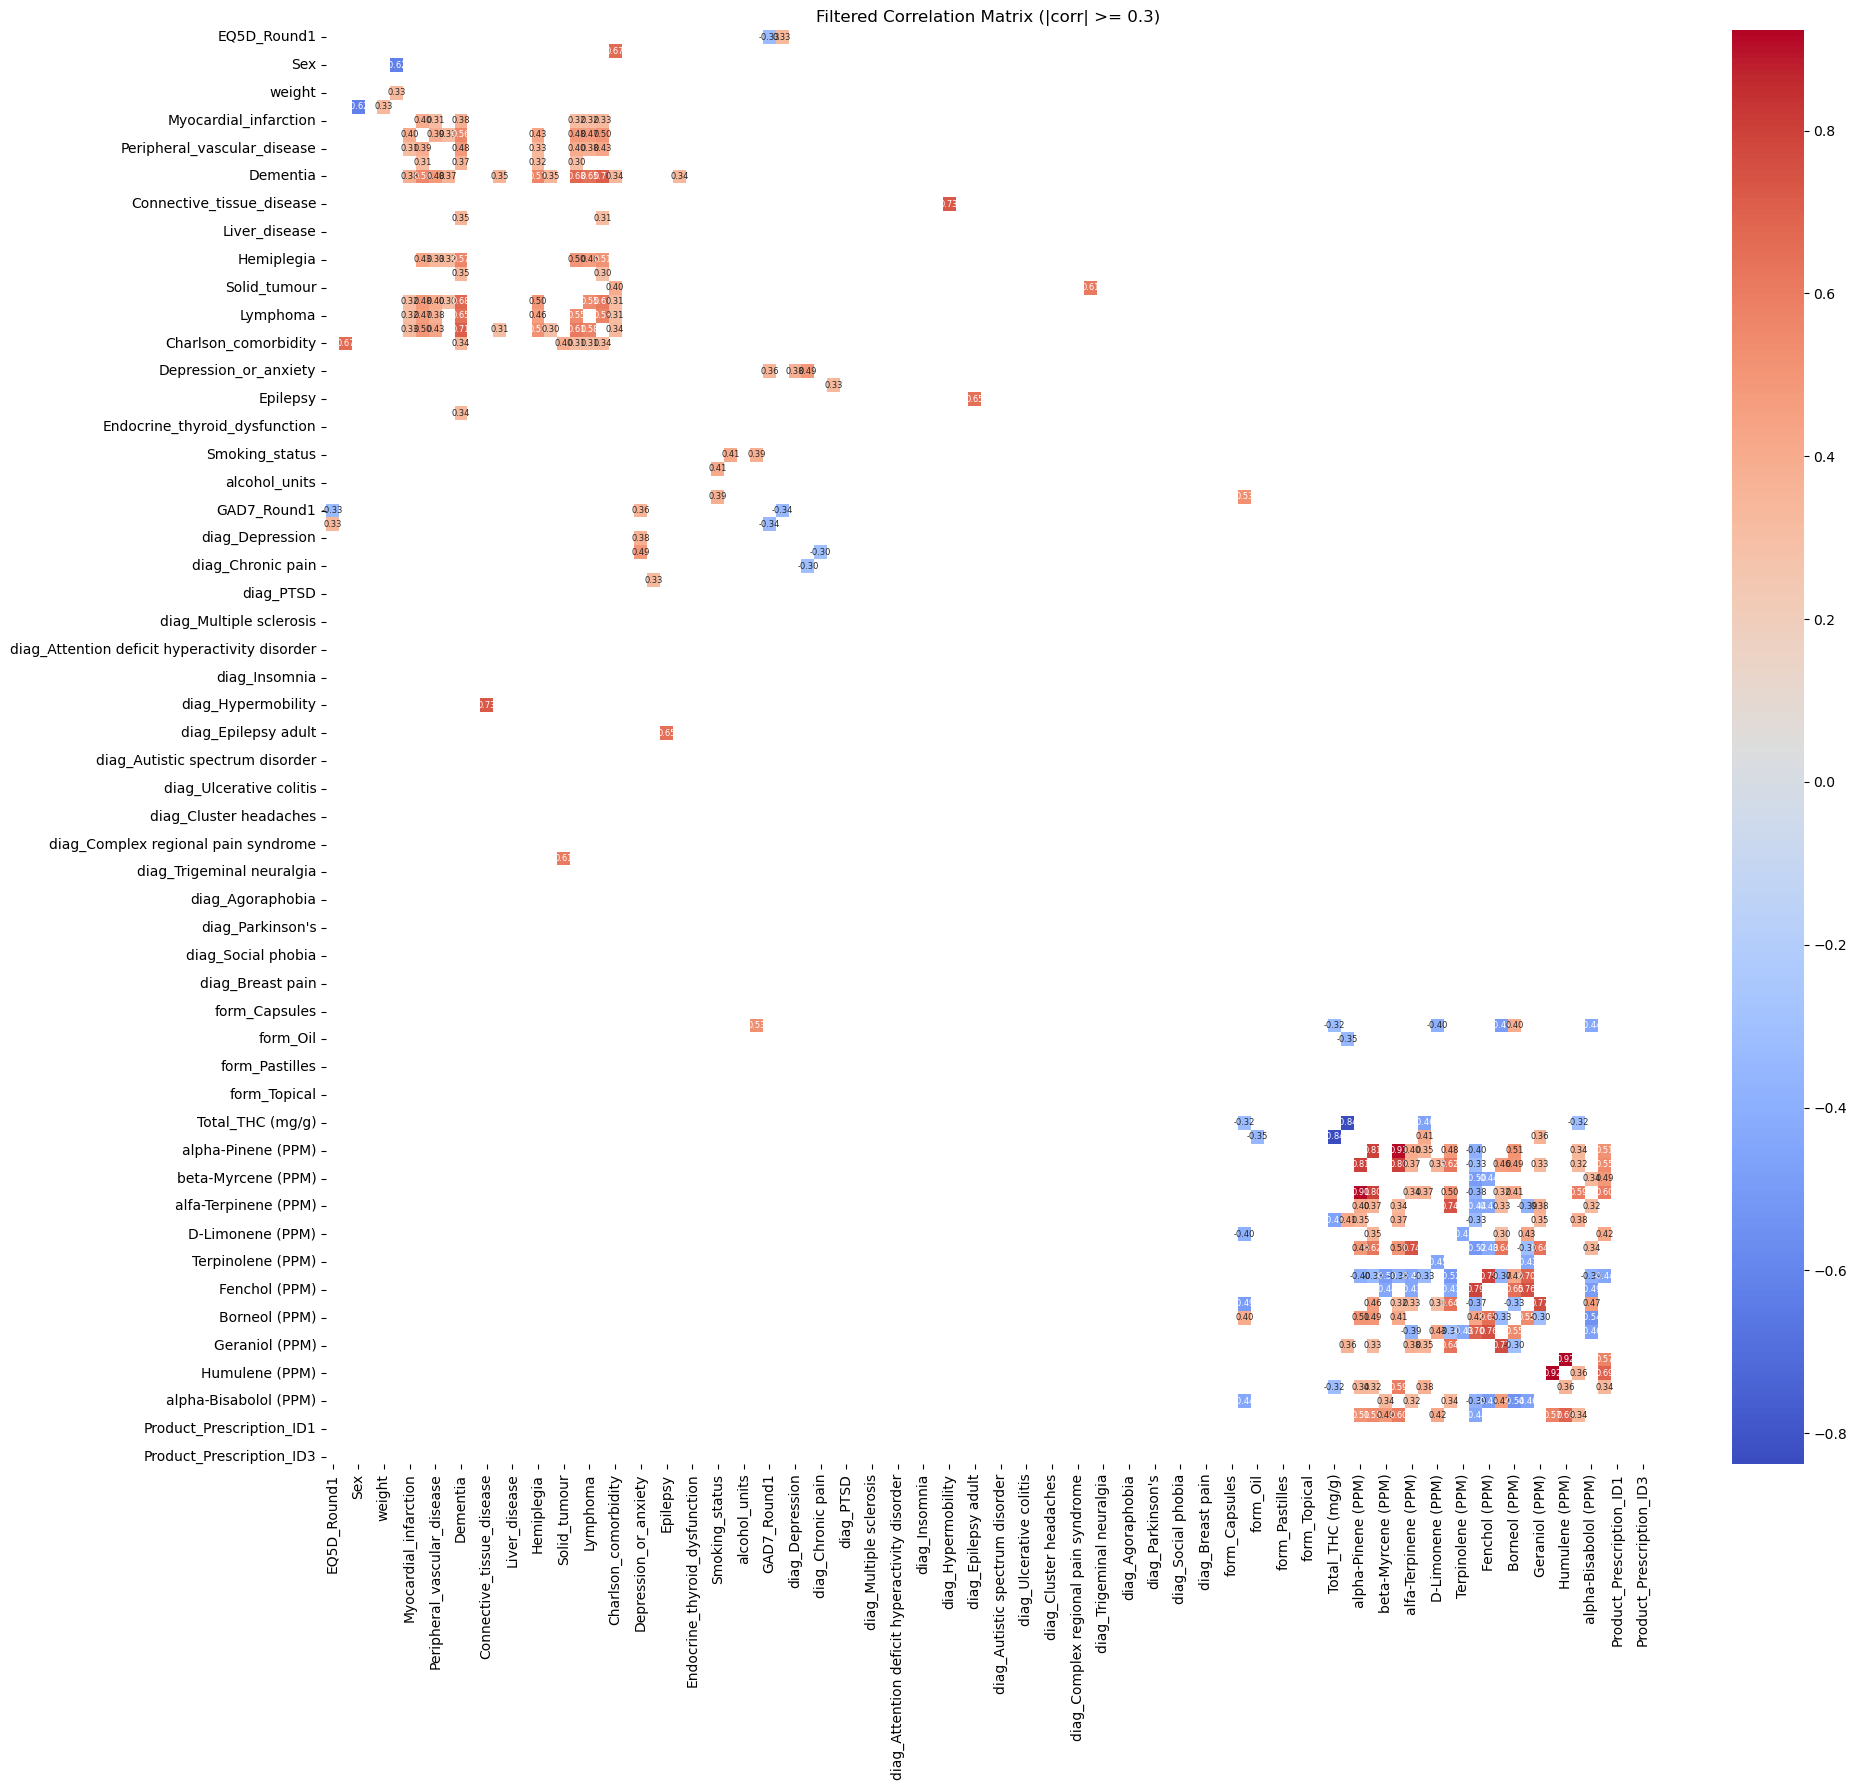

In [ ]:
import numpy as np

threshold = 0.3
filtered_corr = eq5d_corr_matrix.where(np.abs(eq5d_corr_matrix) >= threshold)

np.fill_diagonal(filtered_corr.values, np.nan)

plt.figure(figsize=(20, 18))

sns.heatmap(
    filtered_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},
    mask=filtered_corr.isnull()  # hide NaN
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title(f'Filtered Correlation Matrix (|corr| >= {threshold})')
plt.tight_layout()
plt.show()



Correlation between Predictors and Outcomes

In [8]:
eq5d_predictors = gad7.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
  'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])
eq5d_cor= eq5d_predictors.corr()['EQ5D_Round2'].drop('EQ5D_Round2')
print(eq5d_cor.sort_values(ascending=False))

EQ5D_Round1                                      0.640206
occupation                                       0.231003
insomniaEfficacyMeasure_Round1                   0.216911
diag_Anxiety                                     0.139598
diag_Attention deficit hyperactivity disorder    0.122515
                                                   ...   
GAD7_Round1                                     -0.146237
form_Oil                                        -0.146865
Age                                             -0.158901
diag_Fibromyalgia                               -0.161465
diag_Chronic pain                               -0.170767
Name: EQ5D_Round2, Length: 103, dtype: float64


In [ ]:
## Absolute Value Correlation with Outcome
eq5d_cor= eq5d_predictors.corr()['EQ5D_Round2'].drop('EQ5D_Round2')

# Turn into DataFrame, with absolute value for sorting
corr_df = eq5d_cor.to_frame(name='Correlation')
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()

# Sort by absolute correlation (recommended!)
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset index to make predictor names a column
corr_df = corr_df.reset_index().rename(columns={'index': 'Predictor'})

eq5d_corr = corr_df
print(eq5d_corr)


                          Predictor  Correlation  Abs_Correlation
0                       EQ5D_Round1     0.640206         0.640206
1                        occupation     0.231003         0.231003
2    insomniaEfficacyMeasure_Round1     0.216911         0.216911
3                 diag_Chronic pain    -0.170767         0.170767
4                 diag_Fibromyalgia    -0.161465         0.161465
..                              ...          ...              ...
98        diag_Trigeminal neuralgia     0.001006         0.001006
99               diag_Endometriosis    -0.000855         0.000855
100              diag_Social phobia     0.000815         0.000815
101                            AIDS     0.000764         0.000764
102                  Linalool (PPM)    -0.000051         0.000051

[103 rows x 3 columns]


In [12]:
## Absolute Value Correlation with Outcome (GAD7)

gad7_predictors = gad7.drop(columns=['SID','EQ5D_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
  'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])
gad7_cor= gad7_predictors.corr()['GAD7_Round2'].drop('GAD7_Round2')

# Turn into DataFrame, with absolute value for sorting
corr_df = gad7_cor.to_frame(name='Correlation')
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()

# Sort by absolute correlation (recommended!)
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset index to make predictor names a column
corr_df = corr_df.reset_index().rename(columns={'index': 'Predictor'})
gad7_corr = corr_df
print(gad7_corr)

                          Predictor  Correlation  Abs_Correlation
0                       GAD7_Round1     0.519722         0.519722
1                       EQ5D_Round1    -0.275367         0.275367
2    insomniaEfficacyMeasure_Round1    -0.217262         0.217262
3             Depression_or_anxiety     0.204812         0.204812
4                        occupation    -0.174263         0.174263
..                              ...          ...              ...
98             diag_Eating disorder     0.000845         0.000845
99                   Humulene (PPM)     0.000551         0.000551
100        Product_Prescription_ID1    -0.000419         0.000419
101                        Lymphoma    -0.000282         0.000282
102        Congestive_heart_failure    -0.000235         0.000235

[103 rows x 3 columns]


Univariate Analysis (EQ5D)

In [33]:
print(eq5d_top)

0                       EQ5D_Round1
1                        occupation
2    insomniaEfficacyMeasure_Round1
3                 diag_Chronic pain
4                 diag_Fibromyalgia
Name: Predictor, dtype: object


In [13]:
import statsmodels.api as sm
eq5d_top = eq5d_corr['Predictor'].head(10)

univariate_eq5d = []

for predictor in eq5d_top:
    X = eq5d[[predictor, 'EQ5D_Round2']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['EQ5D_Round2']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_eq5d.append(result)


univariate_eq5d_df = pd.DataFrame(univariate_eq5d)
print(univariate_eq5d_df)


                        Predictor  Beta Coefficient          p-val  R-squared
0                     EQ5D_Round1          0.577047   0.000000e+00   0.409864
1                      occupation          0.117247  1.693714e-247   0.053362
2  insomniaEfficacyMeasure_Round1          0.028029  9.201720e-218   0.047051
3               diag_Chronic pain         -0.103782  1.622175e-134   0.029161
4               diag_Fibromyalgia         -0.160440  2.766600e-120   0.026071
5                             Age         -0.003549  1.649604e-116   0.025250
6                        form_Oil         -0.090323   1.254578e-99   0.021569
7                     GAD7_Round1         -0.006312   8.729489e-99   0.021385
8            Charlson_comorbidity         -0.013422   5.585464e-92   0.019898
9                    diag_Anxiety          0.094778   4.182570e-90   0.019488


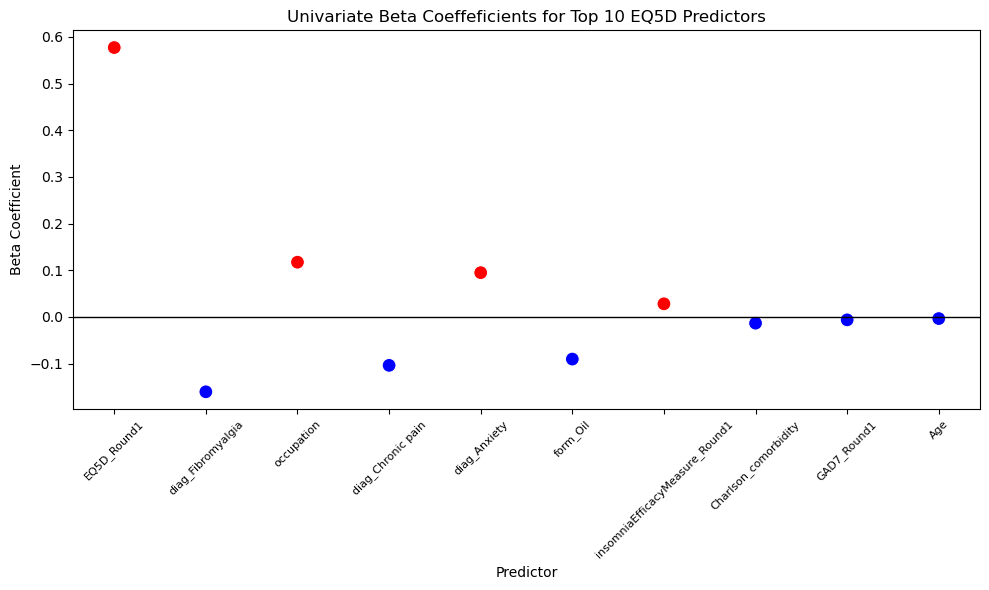

In [19]:
## plot for coefficients

# sorting by absolute value of beta coefficient

univariate_eq5d_df['Abs_Beta'] = univariate_eq5d_df['Beta Coefficient'].abs()
df_plot = univariate_eq5d_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col'] = df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'red', 'Negative': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffeficients for Top 10 EQ5D Predictors')
plt.xlabel('Predictor')
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Beta Coefficient')
plt.tight_layout()
plt.show()

Univariate Analysis (GAD7)

In [21]:
gad7_top = gad7_corr['Predictor'].head(10)

univariate_gad7 = []

for predictor in gad7_top:
    X = gad7[[predictor, 'GAD7_Round2']].dropna()
    X_const = sm.add_constant(X[predictor])
    y = X['GAD7_Round2']
    model = sm.OLS(y, X_const).fit()

    result = {
        'Predictor': predictor,
        'Beta Coefficient': model.params[predictor],
        'p-val': model.pvalues[predictor],
        'R-squared': model.rsquared
    }
    univariate_gad7.append(result)


univariate_gad7_df = pd.DataFrame(univariate_gad7)
print(univariate_gad7_df)

                        Predictor  Beta Coefficient          p-val  R-squared
0                     GAD7_Round1          0.438839   0.000000e+00   0.270111
1                     EQ5D_Round1         -4.855012   0.000000e+00   0.075827
2  insomniaEfficacyMeasure_Round1         -0.549205  2.680271e-218   0.047203
3           Depression_or_anxiety          2.201080  1.050352e-193   0.041948
4                      occupation         -1.730265  5.723951e-140   0.030368
5                    diag_Anxiety          1.879735   1.585816e-92   0.020034
6               diag_Chronic pain         -1.616494   1.799681e-85   0.018488
7                       diag_PTSD          2.769857   2.094911e-42   0.009014
8                             Age         -0.040904   2.856557e-41   0.008763
9                 diag_Depression          1.282700   2.214050e-31   0.006580


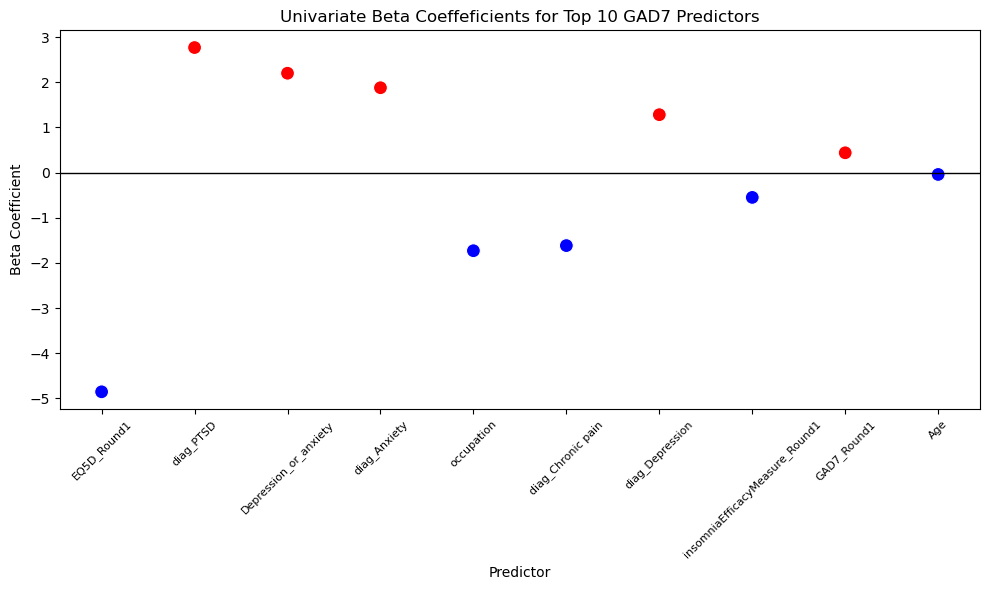

In [20]:
## plot for coefficients

# sorting by absolute value of beta coefficient

univariate_gad7_df['Abs_Beta'] = univariate_gad7_df['Beta Coefficient'].abs()
df_plot = univariate_gad7_df.sort_values(by='Abs_Beta', ascending=False)
df_plot['col'] = df_plot['Beta Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
palette = {'Positive': 'red', 'Negative': 'blue'}
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    y='Beta Coefficient',
    x='Predictor',
    hue='col',
    palette=palette,
    s=100,
    legend=False
)

plt.axhline(y=0, color='black', linewidth=1)

plt.title('Univariate Beta Coeffeficients for Top 10 GAD7 Predictors')
plt.xlabel('Predictor')
plt.xticks(fontsize=8,rotation=45)
plt.ylabel('Beta Coefficient')
plt.tight_layout()
plt.show()

Assumptions Checking

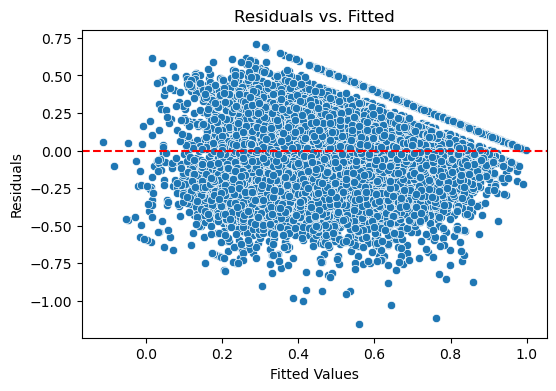

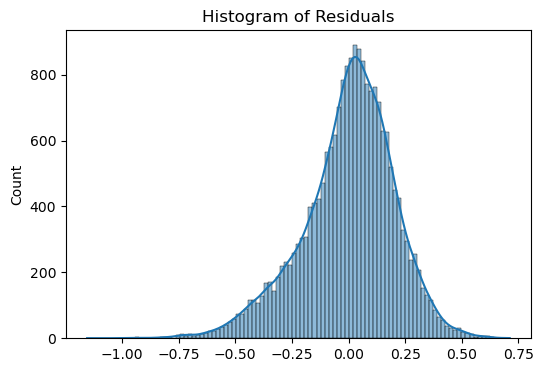

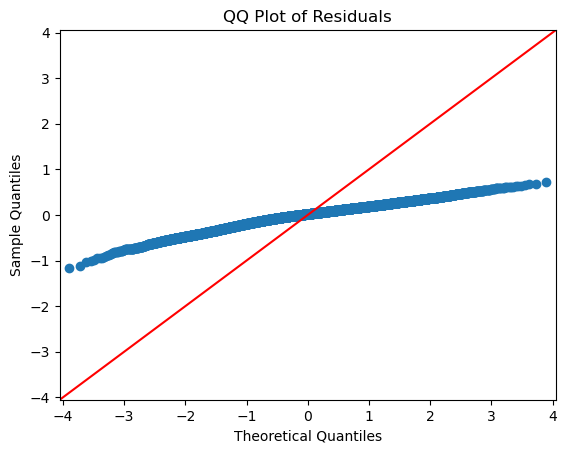

Predictions below min EQ5D: 0
Predictions above max EQ5D: 0


In [17]:
X = gad7.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])

X=X.dropna()
X=sm.add_constant(X)
y=eq5d['EQ5D_Round2']

data = pd.concat([X, y], axis=1).dropna()

X = data.drop(columns='EQ5D_Round2')
X = sm.add_constant(X)
y = data['EQ5D_Round2']

model =sm.OLS(y,X).fit()

y_pred = model.predict(X)
residuals = y - y_pred

# 1) Residuals vs. Fitted plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# 2) Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# 3) QQ plot for normality
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# 4) Check predictions out of bounds
print("Predictions below min EQ5D:", (y_pred < -0.6).sum())
print("Predictions above max EQ5D:", (y_pred > 1.0).sum())


In [34]:
X.head()

,const,EQ5D_Round1,Age,Sex,occupation,weight,height,Myocardial_infarction,Congestive_heart_failure,Peripheral_vascular_disease,...,alpha.-Terpineol (PPM),Geraniol (PPM),Caryophyllene (PPM),Humulene (PPM),Nerolidol (PPM),alpha-Bisabolol (PPM),Total terpene (%w/w),Product_Prescription_ID1,Product_Prescription_ID2,Product_Prescription_ID3
0,1.0,0.283,21,0,0,72.0,182.0,0,0,0,...,509.333333,48.333333,2532.333333,818.00,30.00,413.000,0.976667,0,0,0
1,1.0,0.635,44,0,1,88.0,178.0,0,0,0,...,158.000000,100.000000,479.000000,237.00,131.00,440.000,0.670000,1,1,1
2,1.0,0.442,41,0,1,95.0,183.0,0,0,0,...,166.000000,51.480000,2856.000000,808.00,162.00,1545.000,1.243000,2,2,2
3,1.0,0.332,43,0,1,100.0,196.0,0,0,0,...,348.453333,53.268333,3480.055000,1041.14,114.38,906.695,1.255070,2,3,-1
4,1.0,0.390,40,0,0,80.0,185.0,0,0,0,...,245.000000,25.000000,6169.000000,2229.00,54.00,679.000,1.260000,3,4,3


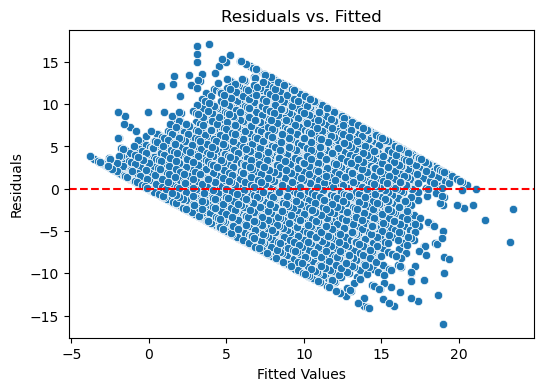

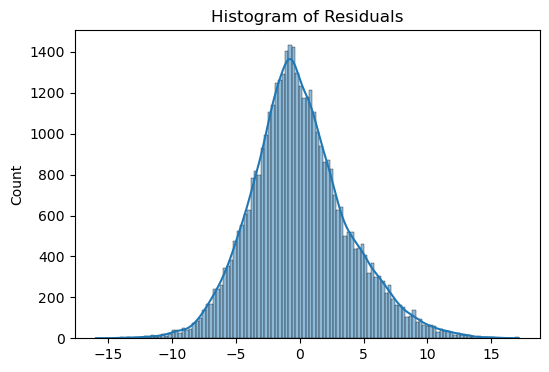

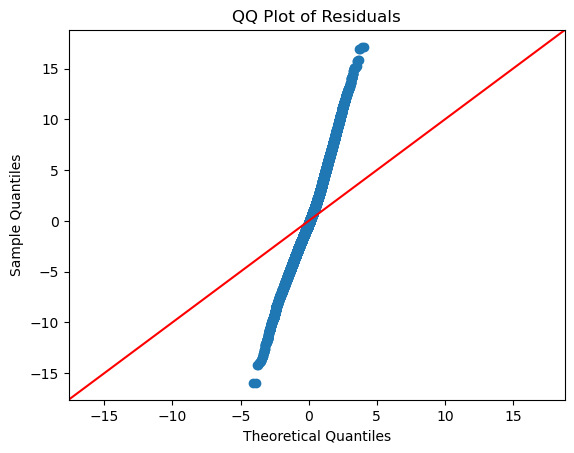

In [ ]:
# 1. Prepare y (ensure numeric)
y = pd.to_numeric(gad7['GAD7_Round2'], errors='coerce')

# 2. Prepare X (drop columns)
X = gad7.drop(columns=[
    'SID', 'EQ5D_Round2',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])

# 3. Align X and y FIRST before any modeling
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

# Fit model (use your cleaned X and y)
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)
residuals = y.to_numpy().ravel() - y_pred.to_numpy().ravel()

y_pred = y_pred.to_numpy().ravel()



# Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

Removing variables with high multicollinearity

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = gad7.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
 'EQ5D_Round2',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])
y = eq5d['EQ5D_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='EQ5D_Round2')
y = data['EQ5D_Round2']


corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)


X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)


ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)


results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})


print(results)


high_corr_pairs = (
    upper
    .where(upper > threshold)
    .stack()                        
    .reset_index()                  
)
high_corr_pairs.columns = ['Var_1', 'Var_2', 'Correlation']

print(high_corr_pairs)


Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'Humulene (PPM)']
           Model    Set  R_squared       MSE
0  Random Forest  Train   0.919551  0.006077
1  Random Forest   Test   0.436095  0.041950
2            OLS  Train   0.444136  0.041989
3            OLS   Test   0.445744  0.041232
                 Var_1              Var_2  Correlation
0     Total_THC (mg/g)   Total_CBD (mg/g)     0.837746
1   alpha-Pinene (PPM)     Camphene (PPM)     0.805620
2   alpha-Pinene (PPM)  beta-Pinene (PPM)     0.914134
3       Camphene (PPM)  beta-Pinene (PPM)     0.800899
4  Caryophyllene (PPM)     Humulene (PPM)     0.923200


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = gad7.drop(columns=[
    'SID', 'EQ5D_Round2',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6', 'GAD7_Round1_x'
])
y = gad7['GAD7_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

# OLS linear regression
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_train_preds = ols.predict(X_train)
ols_test_preds = ols.predict(X_test)


results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'OLS', 'OLS'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, rf_train_preds),
        r2_score(y_test, rf_test_preds),
        r2_score(y_train, ols_train_preds),
        r2_score(y_test, ols_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, rf_train_preds),
        mean_squared_error(y_test, rf_test_preds),
        mean_squared_error(y_train, ols_train_preds),
        mean_squared_error(y_test, ols_test_preds)
    ]
})

print(results)

high_corr_pairs = (
    upper
    .where(upper > threshold)
    .stack()                        
    .reset_index()                  
)
high_corr_pairs.columns = ['Var_1', 'Var_2', 'Correlation']

print(high_corr_pairs)



Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'Humulene (PPM)']
           Model    Set  R_squared        MSE
0  Random Forest  Train   0.897967   2.938914
1  Random Forest   Test   0.285298  20.655128
2            OLS  Train   0.300894  20.136755
3            OLS   Test   0.296094  20.343129
                 Var_1              Var_2  Correlation
0     Total_THC (mg/g)   Total_CBD (mg/g)     0.837633
1   alpha-Pinene (PPM)     Camphene (PPM)     0.805568
2   alpha-Pinene (PPM)  beta-Pinene (PPM)     0.914174
3       Camphene (PPM)  beta-Pinene (PPM)     0.800872
4  Caryophyllene (PPM)     Humulene (PPM)     0.923232


Penalised Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X = gad7.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])
df= df[df['EQ5D_Round2'].notnull()] 

X=df.drop(columns=['EQ5D_Round2'])
y=df['EQ5D_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared       MSE       Alpha
0  Ridge  Train   0.444084  0.041993  184.206997
1  Ridge   Test   0.446011  0.041212  184.206997
2  Lasso  Train   0.442122  0.042141    0.001326
3  Lasso   Test   0.447607  0.041093    0.001326


In [103]:
feature_names = X_train.columns

# 2. build Series of coefficients
ridge_coefs = pd.Series(ridge.coef_, index=feature_names)
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)

# 3. sort by absolute value
ridge_top = ridge_coefs.reindex(ridge_coefs.abs().sort_values(ascending=False).index)
lasso_top = lasso_coefs.reindex(lasso_coefs.abs().sort_values(ascending=False).index)

# 4. pick the top N (e.g. top 10)
N = 10
print("Top 10 Ridge predictors:")
print(ridge_top.head(N))

print("\nTop 10 Lasso predictors:")
print(lasso_top.head(N))

Top 10 Ridge predictors:
EQ5D_Round1                0.150174
occupation                 0.023065
diag_Chronic pain         -0.020134
diag_Fibromyalgia         -0.018145
Linalool (PPM)             0.016371
diag_Multiple sclerosis   -0.014972
Age                       -0.014888
alpha-Pinene (PPM)         0.012765
diag_Neuropathic pain     -0.009207
VTE                       -0.008987
dtype: float64

Top 10 Lasso predictors:
EQ5D_Round1                0.154030
occupation                 0.021720
Age                       -0.015410
diag_Chronic pain         -0.014924
diag_Fibromyalgia         -0.014870
diag_Multiple sclerosis   -0.011935
VTE                       -0.007193
form_Flos                  0.006392
diag_Anxiety               0.006264
diag_Neuropathic pain     -0.006235
dtype: float64


In [89]:
y_train.head()

,EQ5D_Round2,EQ5D_Round2
18599,0.768,0.768
8125,0.837,0.837
5462,0.332,0.332
6442,0.837,0.837
14955,0.770,0.770


In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = gad7.drop(columns=[
    'SID', 'EQ5D_Round2',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6', 'GAD7_Round1_x'
])
y = gad7['GAD7_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_train_preds = ridge.predict(X_train_scaled)
ridge_test_preds = ridge.predict(X_test_scaled)

lasso = LassoCV(alphas=np.logspace(-3, 3, 50), cv=5, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_train_preds = lasso.predict(X_train_scaled)
lasso_test_preds = lasso.predict(X_test_scaled)

penalised_results = pd.DataFrame({
    'Model': ['Ridge', 'Ridge', 'Lasso', 'Lasso'],
    'Set': ['Train', 'Test', 'Train', 'Test'],
    'R_squared': [
        r2_score(y_train, ridge_train_preds),
        r2_score(y_test, ridge_test_preds),
        r2_score(y_train, lasso_train_preds),
        r2_score(y_test, lasso_test_preds)
    ],
    'MSE': [
        mean_squared_error(y_train, ridge_train_preds),
        mean_squared_error(y_test, ridge_test_preds),
        mean_squared_error(y_train, lasso_train_preds),
        mean_squared_error(y_test, lasso_test_preds)
    ],
    'Alpha': [
        ridge.alpha_, ridge.alpha_,
        lasso.alpha_, lasso.alpha_
    ]
})

print(penalised_results)


   Model    Set  R_squared        MSE       Alpha
0  Ridge  Train   0.300672  20.143125  429.193426
1  Ridge   Test   0.295751  20.353052  429.193426
2  Lasso  Train   0.298180  20.214905    0.029471
3  Lasso   Test   0.300150  20.225924    0.029471


In [109]:
feature_names = X_train.columns

# 2. build Series of coefficients
ridge_coefs = pd.Series(ridge.coef_, index=feature_names)
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)

# 3. sort by absolute value
ridge_top = ridge_coefs.reindex(ridge_coefs.abs().sort_values(ascending=False).index)
lasso_top = lasso_coefs.reindex(lasso_coefs.abs().sort_values(ascending=False).index)

# 4. pick the top N (e.g. top 10)
N = 10
print("Top 10 Ridge predictors:")
print(ridge_top.head(N))

print("\nTop 10 Lasso predictors:")
print(lasso_top.head(N))

Top 10 Ridge predictors:
GAD7_Round1               2.223776
EQ5D_Round1              -0.630195
occupation               -0.374036
Linalool (PPM)           -0.281666
alpha.-Terpineol (PPM)    0.227339
diag_Chronic pain        -0.199077
diag_PTSD                 0.182257
Total terpene (%w/w)     -0.177925
form_Flos                -0.177414
Allergy                  -0.175279
dtype: float64

Top 10 Lasso predictors:
GAD7_Round1              2.334957
EQ5D_Round1             -0.585217
occupation              -0.355514
form_Flos               -0.187252
Depression_or_anxiety    0.161689
diag_Chronic pain       -0.160455
diag_PTSD                0.153389
Allergy                 -0.134763
weight                  -0.125024
Sex                      0.104672
dtype: float64


Ordinal Regression for GAD7

In [ ]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

X = gad7.drop(columns=[
    'SID',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])
y = gad7['GAD7_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

model = OrderedModel(
    endog=y,
    exog=X,
    distr='logit'  # 'logit' = ordinal logistic, 'probit' = ordinal probit
)

result = model.fit(method='bfgs')

print(result.summary())

pred_probs = result.predict(X)
print(pred_probs.head())

Optimization terminated successfully.
         Current function value: 2.537291
         Iterations: 402
         Function evaluations: 413
         Gradient evaluations: 413
                             OrderedModel Results                             
Dep. Variable:            GAD7_Round2   Log-Likelihood:                -52190.
Model:                   OrderedModel   AIC:                         1.046e+05
Method:            Maximum Likelihood   BIC:                         1.056e+05
Date:                Tue, 24 Jun 2025                                         
Time:                        12:10:42                                         
No. Observations:               20569                                         
Df Residuals:                   20443                                         
Df Model:                         105                                         
                                                            coef    std err          z      P>|z|      [0.025     

c:\Users\abbyh\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit on training data
model = OrderedModel(
    endog=y_train,
    exog=X_train,
    distr='logit'
)
result = model.fit(method='bfgs')

# Predict on test data
pred_probs_test = result.predict(X_test)
pred_class_test = pred_probs_test.idxmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred_class_test)
print(f"Test set accuracy: {acc:.3f}")



Optimization terminated successfully.
         Current function value: 2.542845
         Iterations: 431
         Function evaluations: 441
         Gradient evaluations: 441
Test set accuracy: 0.185


c:\Users\abbyh\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [98]:
# Mean absolute error
mae = np.mean(np.abs(y_test - pred_class_test))
print(f"Test MAE: {mae:.2f}")

# Accuracy within ±1
acc_within1 = np.mean(np.abs(y_test - pred_class_test) <= 1)
print(f"Accuracy within ±1: {acc_within1:.2f}")

# Accuracy within ±2
acc_within2 = np.mean(np.abs(y_test - pred_class_test) <= 2)
print(f"Accuracy within ±2: {acc_within2:.2f}")

Test MAE: 3.17
Accuracy within ±1: 0.37
Accuracy within ±2: 0.51


In [99]:
## Reducing High Collinearity var


X = gad7.drop(columns=[
    'SID',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6'
])
y = gad7['GAD7_Round2']


data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Variables to drop due to high collinearity: {to_drop}")

X_reduced = X.drop(columns=to_drop)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Fit on training data
model = OrderedModel(
    endog=y_train,
    exog=X_train,
    distr='logit'
)
result = model.fit(method='bfgs')

# Predict on test data
pred_probs_test = result.predict(X_test)
pred_class_test = pred_probs_test.idxmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred_class_test)
print(f"Test set accuracy: {acc:.3f}")


# Mean absolute error
mae = np.mean(np.abs(y_test - pred_class_test))
print(f"Test MAE: {mae:.2f}")

# Accuracy within ±1
acc_within1 = np.mean(np.abs(y_test - pred_class_test) <= 1)
print(f"Accuracy within ±1: {acc_within1:.2f}")

# Accuracy within ±2
acc_within2 = np.mean(np.abs(y_test - pred_class_test) <= 2)
print(f"Accuracy within ±2: {acc_within2:.2f}")

Variables to drop due to high collinearity: [' Total_CBD (mg/g)', 'Camphene (PPM)', 'beta-Pinene (PPM)', 'Humulene (PPM)', 'GAD7_Round1']
Optimization terminated successfully.
         Current function value: 2.542943
         Iterations: 429
         Function evaluations: 438
         Gradient evaluations: 438
Test set accuracy: 0.187


In [101]:
print(y.min(), y.max())

0.0 21.0


Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

df = gad7.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x'])

df= df[df['EQ5D_Round2'].notnull()] 

X=df.drop(columns=['EQ5D_Round2'])
y=df['EQ5D_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42,
                         early_stopping=True,       
                         validation_fraction=0.1,   
                         n_iter_no_change=10))      
])


param_grid = {
    'mlp__hidden_layer_sizes':[
    (100,50), (100,50,25),
    (200,100,50),
    (200,100,50,25)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 1e-4, 1e-3],    
    'mlp__learning_rate_init': [1e-5 ,1e-4, 1e-3, 1e-2]
}


gs = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Train R²:", gs.score(X_train, y_train))
print("Test  R²:", gs.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))


Best params: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (200, 100, 50, 25), 'mlp__learning_rate_init': 0.01}
Train R²: 0.48645615656418484
Test  R²: 0.4249343840967633
Train MSE: 0.03879234203888733
Test  MSE:  0.04277977085000293


In [16]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def sample_hidden_layer_sizes(n_iter, min_layers=1, max_layers=8, min_units=50, max_units=300, random_state=None):

    rng = np.random.default_rng(random_state)
    sizes = set()
    while len(sizes) < n_iter:
        # Sample number of layers
        n_layers = rng.integers(min_layers, max_layers + 1)
        # Sample units for each layer
        units = tuple(rng.integers(min_units, max_units + 1, size=n_layers).tolist())
        sizes.add(units)
    return list(sizes)


hidden_layer_candidates = sample_hidden_layer_sizes(n_iter=50, random_state=42)


param_dist = {
    'mlp__hidden_layer_sizes': hidden_layer_candidates,
    'mlp__alpha': loguniform(1e-5, 1e-2),
    'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
    'mlp__activation': ['relu', 'tanh']
}

# 3. Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ))
])


rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)


rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Train R²:", rs.score(X_train, y_train))
print("Test  R²:", rs.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Best params: {'mlp__activation': 'relu', 'mlp__alpha': 1.667761543019792e-05, 'mlp__hidden_layer_sizes': (88, 174, 224, 174, 161, 91, 145, 109), 'mlp__learning_rate_init': 0.008979064194712979}
Train R²: 0.4611891759677381
Test  R²: 0.426247106003356
Train MSE: 0.037582328435232355
Test  MSE:  0.04402744219854004


In [17]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ('ols',      LinearRegression()),
    ('ridge',    RidgeCV(alphas=[1e-3,1e-2,1e-1,1])),
    ('rf',       RandomForestRegressor(n_estimators=200, max_depth=20)),
    ('mlp',      MLPRegressor(hidden_layer_sizes=(88, 174, 224, 174, 161, 91, 145, 109), max_iter=500))
]

stack = StackingRegressor(
    estimators=base_models,
    final_estimator=RidgeCV(alphas=[1e-3,1e-2,1e-1,1]),
    cv=5, n_jobs=-1
)

stack.fit(X_train, y_train)
print("Stacked Test  R²:", stack.score(X_test, y_test))


Stacked Test  R²: 0.45265593001043825


In [18]:
y_train_pred = stack.predict(X_train)
y_test_pred  = stack.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Train MSE: 0.024982102664756235
Test  MSE:  0.04071753421300254


In [23]:
X = gad7.drop(columns=[
    'SID', 'EQ5D_Round2',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6', 'GAD7_Round1_x'
])
y = gad7['GAD7_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42,
                         early_stopping=True,       
                         validation_fraction=0.1,   
                         n_iter_no_change=10))      
])


param_grid = {
    'mlp__hidden_layer_sizes':[
    (100,50), (100,50,25),
    (200,100,50),
    (200,100,50,25)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 1e-4, 1e-3],    
    'mlp__learning_rate_init': [1e-3, 1e-2]
}


gs = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Train R²:", gs.score(X_train, y_train))
print("Test  R²:", gs.score(X_test, y_test))

y_train_pred = gs.predict(X_train)
y_test_pred  = gs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Best params: {'mlp__activation': 'relu', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate_init': 0.001}
Train R²: 0.3476819835097036
Test  R²: 0.27381407151283244
Train MSE: 18.789082475511528
Test  MSE:  20.987030280375198


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from scipy.stats import loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = gad7.drop(columns=[
    'SID', 'EQ5D_Round2',
    'GAD7_Round2', 'GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5',
    'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8', 'GAD7_Round9',
    'GAD7_Round10', 'GAD7_Round11', 'GAD7_Round12', 'GAD7_Round13',
    'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6', 'GAD7_Round1_x'
])
y = gad7['GAD7_Round2']

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns='GAD7_Round2')
y = data['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def sample_hidden_layer_sizes(n_iter, min_layers=1, max_layers=8, min_units=50, max_units=300, random_state=None):

    rng = np.random.default_rng(random_state)
    sizes = set()
    while len(sizes) < n_iter:
        # Sample number of layers
        n_layers = rng.integers(min_layers, max_layers + 1)
        # Sample units for each layer
        units = tuple(rng.integers(min_units, max_units + 1, size=n_layers).tolist())
        sizes.add(units)
    return list(sizes)


hidden_layer_candidates = sample_hidden_layer_sizes(n_iter=50, random_state=42)


param_dist = {
    'mlp__hidden_layer_sizes': hidden_layer_candidates,
    'mlp__alpha': loguniform(1e-5, 1e-2),
    'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
    'mlp__activation': ['relu', 'tanh']
}

# 3. Build the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ))
])


rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)


rs.fit(X_train, y_train)
print("Best params:", rs.best_params_)
print("Train R²:", rs.score(X_train, y_train))
print("Test  R²:", rs.score(X_test, y_test))



Best params: {'mlp__activation': 'relu', 'mlp__alpha': 0.0006173770394704573, 'mlp__hidden_layer_sizes': (108,), 'mlp__learning_rate_init': 0.0001994916615063395}
Train R²: 0.33508580734537197
Test  R²: 0.28737167184067924
Train MSE: 18.789082475511528
Test  MSE:  20.987030280375198


In [24]:
from sklearn.metrics import mean_squared_error
y_train_pred = rs.predict(X_train)
y_test_pred  = rs.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE: ", mean_squared_error(y_test,  y_test_pred))

Train MSE: 19.15189721746986
Test  MSE:  20.59521083380109


Random Forest

In [12]:
print(X_train['primDiag'])

110109            Depression
100026              Insomnia
118703    Ulcerative colitis
71756       Neuropathic pain
104073          Fibromyalgia
                 ...        
119951            Depression
103766          Chronic pain
132004          Chronic pain
146939          Chronic pain
122030          Chronic pain
Name: primDiag, Length: 142336, dtype: object


In [9]:
X_train.columns.tolist()

['EQ5D_Round1',
 'Product_Prescription1',
 'Product_Prescription2',
 'Product_Prescription3',
 'Totalquantity_Prescription1',
 'Totalquantity_Prescription2',
 'Totalquantity_Prescription3',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'BMI',
 'primDiag',
 'secDiag',
 'tertDiag',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'Cannabis_use_frequency',
 'Cannabis_use_route',
 'Cannabis_gram_per_day',
 'Canna

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

df = gad7.drop(columns=['SID','GAD7_Round2','GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13',
'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'GAD7_Round1_x','EffectivePrescriptionDate', 'Product_Prescription1',
 'Product_Prescription2',
 'Product_Prescription3',
 'Totalquantity_Prescription1',
 'Totalquantity_Prescription2',
 'Totalquantity_Prescription3'])

df= df[df['EQ5D_Round2'].notnull()] 

X=df.drop(columns=['EQ5D_Round2'])
y=df['EQ5D_Round2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(random_state=42)


param_grid = {
    'rf__n_estimators': [100, 500, 1000, 2000],
    'rf__max_depth': [None, 5, 10, 20, 50],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4, 8],
    'rf__max_features': ['sqrt', 'log2', 0.2, 0.5, None],
    'rf__bootstrap': [True, False]
}

pipe = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

# 3. CV splitter
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Instantiate GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=3,
    return_train_score=True
)


grid.fit(X_train, y_train)


results = pd.DataFrame(grid.cv_results_)


for split in ['train', 'test']:
    results[f'mean_{split}_MSE']  = -results[f'mean_{split}_MSE']
    results[f'mean_{split}_RMSE'] = np.sqrt(results[f'mean_{split}_MSE'])


display_cols = [
    'params',
    'mean_train_R2',  'mean_test_R2',
    'mean_train_MSE', 'mean_test_MSE',
    'mean_train_RMSE','mean_test_RMSE'
]
print("Top 5 hyper-parameter settings by CV R²:\n")
print(results[display_cols]
      .sort_values('mean_test_R2', ascending=False)
      .head(5)
      .to_string(index=False))


best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

test_mse  = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2   = r2_score(y_test, y_pred)


print(f"  Test MSE : {test_mse:.4f}")
print(f"  Test RMSE: {test_rmse:.4f}")
print(f"  Test R²  : {test_r2:.4f}")


KeyError: "['EffectivePrescriptionDate', 'Product_Prescription1', 'Product_Prescription2', 'Product_Prescription3', 'Totalquantity_Prescription1', 'Totalquantity_Prescription2', 'Totalquantity_Prescription3'] not found in axis"